<b>What is a neural Turing Machine?</b>

*  The basic idea of NTM is to couple a neural network to external memory resources, which can then interact with by attentional process.

* The combined system is analogous to a Turing Machine or Von-Neumann Architecture, but is differentiable end-to-end

* This allows training it end to end, with a  gradient descent technique



<b>Some Intro:</b>

* The computer programs uses three fundamental units for achieving Von-Neumann cycle:
    -  Elementary Ops [eg:Arithmetic/Logical Operations]
    -  Control Flow
    -  External memory
    


* But the current Machine Learning techniques gives little to no emphasis on the last two parts.


* However RNNs are different from others in the sense, they can learn from previous sequence data, and it's transformations over extended periods of time.

* This concept is practically enriched in NTM concepts by introducing large addressable memory,an analogy to turing's enrichment of finite state machines by infinite memory tape.



<b> So how is NTM different from a turing machine?</b>

* Unlike turing machine , NTM is totally differentiable.

* So what this means is it can be trained , well using a gradient descent. Dude that's awesome rite?
    - A computer that can be taught to learn a program, like copy ,sort etc

<b> A look into human cognition? </b>

[1] Working Memory:
       -  In human cognition, a 'working memory' abstractly refers to a unit that can temporarily(short-term) store             information and can do a rule based manipulation over it.
       -  An NTM  uses an attention based technique to read and write memory selectively
       
[2] In neuroscience, the working memory process has been ascribed to the functioning of a system compossed of the prefrontal cortex and basal ganglia.



<b>LSTM - The ADAM and the EVE of working memory !!!</b>


* This very architecture is built with only one goal:- Address vanishing and exploding gradient problem. [can be relabelled as vanishing and exploding sensitivity ]

* The story starts from Mr.RNN, whO is a very funny and awesome guy. He looks similiar to Mr.HMM, Hidden Markov Model. 
    - They both are good at modelling the dynamic state nature of an fsm.
    - They key difference is that RNN uses a distributed representation of states, which offers him a significant memory and computational capacity
    - Dynamic state is crucial , in the sense, it helps keeping context dependent computation.
    
* Now Mr.RNN needs to be upgraded and gave us LSTM.

* LSTM solves the problem of vanishing/exploding gradients by embedding perfect integrators for memory storage in the network
    - A simple example for perfect integrator is :
            x(t+1) = x(t) + i(t) 
                    where i(t) is the input
            
    - If we attach a mechanism to this integrator , that allows an enclosing network to chose when the integrator listens to the input, a programmable gate, depending on the context, we have a new eqn:
            x(t+1) = x(t) + g(context)i(t)

<b><u>And gentlemen, let's welcome the new hero, the one and only - NTM </b></u>

* An NTM contains mainly 2 parts:

    1. Neural network controller:
        -  Like most neural network, controller interacts with the external world via input and output vectors
        -  Unlike standard network, it also interacts with a memory matrix using selective read and write ops.
        -  By analogy to the turing machine , we refer to the network outputs that parametrise these ops as 
            'heads'<br>
          
    2. Memory Bank

*******

<br> <img src='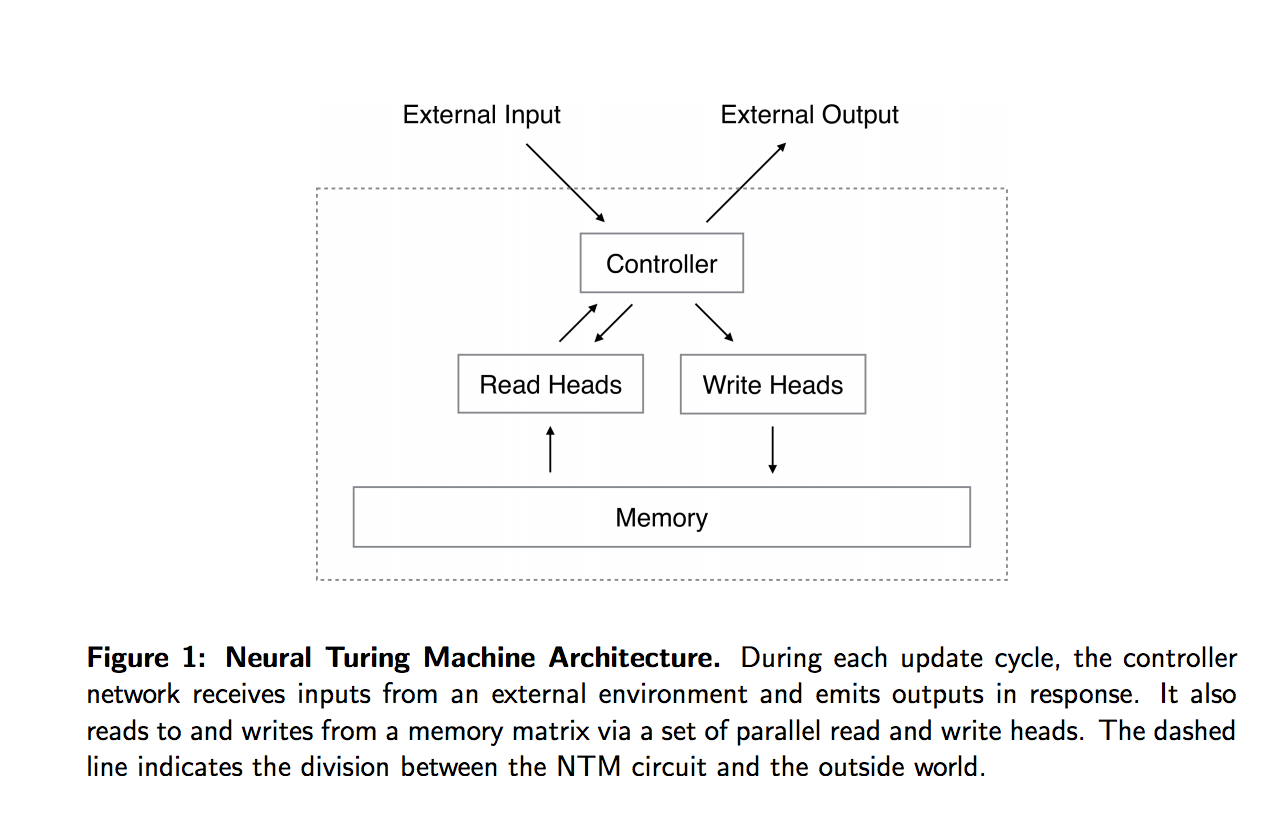
' width=500 align = left><br>


<hr>
#### The importance of ATTENTION!!!

* Crucially , every component of the architecture is differentiable. This is achieved by defining blurry read and write operations that interact to a greater or lesser degree with all the elements in memory.

* The degree of blurriness is determined by an attentional "<b>focus</b>" mechanism , that constrains each read and write operation to interact with a small portion of the memory , while ignoring the rest.

* Because interaction with the memory is highly sparse, the NTM is biased towards storing data without interference.

* The specialized outputs from heads decide the attentional focus on memory locations.

* These outputs define a normalized weighting, over the rows in the memory matrix [also refered to as memory "<i>locations</i>"].

* Each weighting, one per read or write head, determines the degree to which the head reads or writes at each location.

* A head can thereby attend sharply to the  memory at a single location or weakly to the memory at many locations.

#### READING..!!

* Let <b><b> $\boldsymbol M_t$</b> </b> be the contents of the <b> N x M </b>  memory matrix at time <b>t</b>, where <b>N</b> is the number of memory location and <b>M</b> is the vector size at each location.


* Let $\boldsymbol w_t$ be the vector of normalized weightings over the $\boldsymbol N$ Locations emitted by the read head at time $\boldsymbol t$ 


* Since all weightings are normalized, the N elements  $\boldsymbol w_t(i)$ obeys the following constraints:
    * $\boldsymbol \sum_{i} w_t(i) = 1$ ,$\qquad $where  $0 \leq w_t(i)  \leq 1,     \forall i$
    
    
* The length $\boldsymbol M$ read vector $\boldsymbol r_t$ returned by the head is defined as a convex combination of the row vectors $\boldsymbol M_t(i)$ in memory:

$$r_t \leftarrow  \sum_i w_t(i)M_t(i)$$

<b>WRITING ..!!! </b>

* Taking inspiration from LSTM's input and forget gates, we decompose each write into 2 pairs: <b><i> "erase"</i></b> followed by <b><i>"add"</b></i>

* Given a weighting $ \boldsymbol w_t$ emitted by a write head at time $\boldsymbol t$ , along with an erase vector , $e_t$ , whose $M$ elements all lie in the $range(0,1)$ , the memory vectors from the previous time step,  $M_{t-1}(i)$ are modified as follows:
    * <b>$\boldsymbol \qquad \tilde M_t(i)   \leftarrow M_{t-1}(i)[1-w_t(i)e_t]  $ </b>,
        where 1 is a row-vector of all 1-s,
    
    
* Each write head also produces a length M "<b>add vector</b>" , $\boldsymbol a_t$ , which is added to the memory after the erase step is performed. That way the final memory is given by:
    * $ \boldsymbol \qquad M_t  \leftarrow \tilde M_t+w_t(i)a_t$


#### Believe me it's all about "Addressing"

* Above, we've seen the equations for weightings, both for reading and writing.Now let's have a peek at how these weightings are produced.

* These weightings arise by combining two addressing mechanisms with complementary facilities:
    1. Content Based Addressing:-
        * Focuses attention on locations, based on the similarity between their current values and values emitted by their controller.
        * The advantage of content based addressing is the ease of retrieval. The controller will produce an approximation to a part of stored data,which is  then compared to memory to yield exact stored data.
        
    2. Location based addressing :-
        * These are used for retrieving data, where content has not much significance. For eg: in arithmetic ops x+y, value of x and y has nothing much to do with storing them.
    

> <b>Address? 221B Baker Street - Yes, you are right , I'm Holmes</b>

<img src='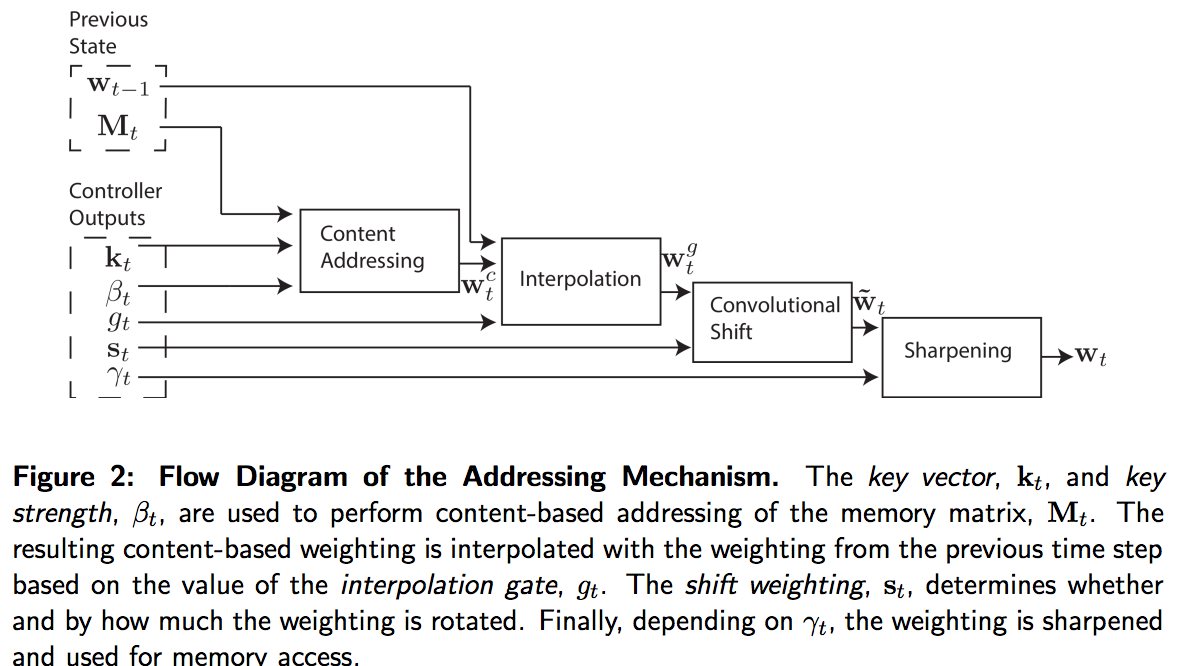
' width=600>

#### [A]. Focusing by Content

* For content addressing, each head(whether it's read or write) produces a key vector "$\boldsymbol k_t$" which is of length M, is compared to each vector $\boldsymbol M_t(i)$ by a similarity measure K[u,v].

* The content-based system produces a normalized weighting  $\boldsymbol w_t^c$ based on similarity and positive key strength $\boldsymbol \beta_t$ ,  which can attenuate or amplify the precision of the focus.

$$\boldsymbol w_t^c(i) \leftarrow \frac{exp(\beta_tK[\boldsymbol k_t, \boldsymbol M_t(i)])}{\Sigma_jexp(\beta_tK[\boldsymbol k_t, \boldsymbol M_t(j)])}$$


* In the original paper the distance measure used is cosine similiarity:
$$K[u,v] \leftarrow \frac{u.v}{\|u \| . \| v \|} $$


#### [B]. Focusing by location

* A location based addressing mechanism is designed to facilitate both simple iteration over locations and random access jumps.It does so by a rotational shift of weighting


* Prior to rotation, each head emits a scalar interpolation gate $\boldsymbol g_t$ in the range $\boldsymbol (0,1)$


* The value of $g$ is used to blend between the weight '$\boldsymbol w_{t-1}$' produced by the head at the previous time step and "$\boldsymbol w_t^c$" produced by the content system at the current time-step yielding the gated weighting "$\boldsymbol w_t^g$":


$$\boldsymbol w_t^g \leftarrow \boldsymbol g_tw_t^c+\left( 1-\boldsymbol g_t \right)\boldsymbol w_{t-1}$$



* If we look at the above equation , it is evident that a $\boldsymbol g_t$ of zero will completely ignore content based weight and $\boldsymbol g_t$ of 1 , does the same to previous time weight $\boldsymbol w_{t-1}$


* After interpolation, each head emits a shift weighting $\boldsymbol s_t$ , that defines a normalized distribution over the allowed integer shifts.


* For example , if the shifts between -1 and 1 are allowed, $\boldsymbol s_t$ has 3 elements corresponding to the degree of which  shifts of -1,0,1 are performed.


* If we index the $N$ memory locations from 0 to $N-1$, the rotation applied to $\boldsymbol w_t^g$ by $\boldsymbol s_t$ can be expressed as the following circular convolution:

$$\tilde w_t(i) \leftarrow \sum_{j=0}^{N-1}w_t^g(j)s_t(i-j)$$
    $\qquad \qquad \qquad \qquad$[ In the above eqn, all the arithmetics is computed modulo-N ]


* The above equation is some what dangerous , in the sense the convolution operation can cause leakage or dispersion of weightings over time, if the shift weightings is not sharp. For examples if the shifts of -1,0,1 are given weights of 0.1,0.8,0.1 the rotation will transform a weighting focused at a single point into one slightly blurred over 3 points.

* To combat the above problem, each head emits one further scalar, $\boldsymbol \gamma_t \geq \boldsymbol 1$ , whose effect is to sharpen the final weighting as follows:
$$\boldsymbol w_t(i) \leftarrow \frac{\tilde w_t(i)^{\gamma_t}}{\sum_j \tilde w_t(j)^{\gamma_t} }$$




---------------

#### Now let's take a step back and summarize....

These are the ops we did:
1. Controller emitted $k_t$ and $\beta_t$ , which is then used to find the mem similiarity w.r.t previous $M_{t-1}$ and we got $w_t^c$ for content based addressing.


2. Now we have to chose how to take the addresses of interest, do we have to put stress on content based weights or previous weights. This is where the hyper param $g_t$ came into picture. It interpolates with selection on the weights for read/write mem to address.


3. Now we need to decide on the shifts for each mem address, basically the rotations required w.r.t each mem vectors. There comes our next kid, Mr. $s_t$, the shift hyper param. This can be seen like a softmax output vector , with prob for change w.r.t each cell.


4. Now the only problem remaining is to avoid getting the weights blurred. So we introduce one more param "$\gamma_t$" to sharpen the final weighting.